In [1]:
# Задание 1
# Импортируйте библиотеки pandas, numpy и matplotlib.



import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
# Создайте датафреймы X и y из этих данных.
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [3]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [12]:
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


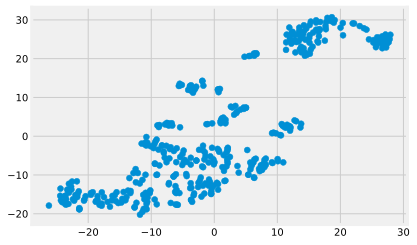

In [13]:
# Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

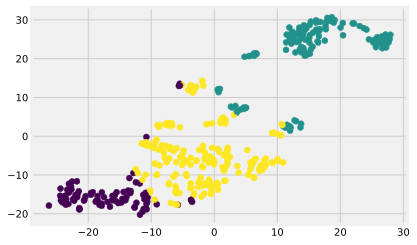

In [22]:
#Задание 2
#С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
#используйте все признаки из датафрейма X_train.
#Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
#Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
#и раскрасьте точки из разных кластеров разными цветами.


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [37]:
#Вычислите средние значения price и CRIM в разных кластерах.
labels_train = kmeans.predict(X_train_scaled)

In [38]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))
print('В среднем: {}'.format(X_train['CRIM'].mean()))

Кластер 0: 0.07800066666666669
Кластер 1: 0.40426514705882355
Кластер 2: 10.958129680000003
В среднем: 3.609124628712873


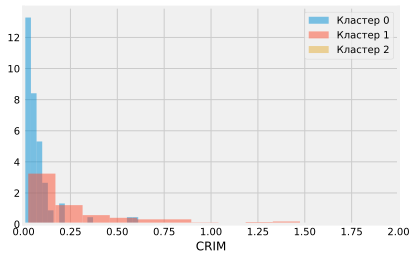

In [39]:
# Посмотрим разницу в преступности на гистограмме (масштаб подобрал так, что бы было лучше видно основной массив данных)
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 2)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

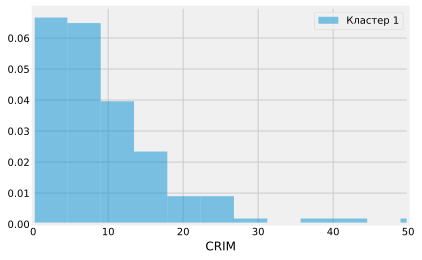

In [41]:
# Посмотрим отдельно по первому кластеру, т.к. он явно выделяется повышенной криминальностью.
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)


plt.xlim(0, 50)
plt.legend(['Кластер 1'])
plt.xlabel('CRIM')

plt.show()

In [35]:
# * Задание 3
# Примените модель KMeans, построенную в предыдущем задании,
# к данным из тестового набора.
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
X_test_tsne = tsne.fit_transform(X_test_scaled)

print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


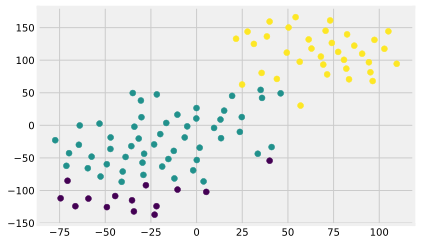

In [36]:
labels_train = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train)

plt.show()

In [42]:
labels_test = kmeans.predict(X_test_scaled)

In [43]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))
print('В среднем: {}'.format(X_test['CRIM'].mean()))

Кластер 0: 0.08618571428571427
Кластер 1: 0.25200716981132076
Кластер 2: 10.165531142857143
В среднем: 3.630946764705883


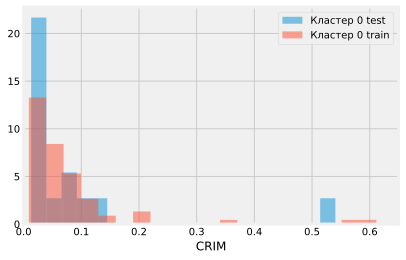

In [54]:
# Отобразим графически тестовый и тренировочный набор данных, допустим, для кластера 1 (0))
plt.hist(X_test.loc[labels_test == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 0.65)
plt.legend(['Кластер 0 test', 'Кластер 0 train', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

In [50]:
# Теперь посмотрим средние цены 
print(f'Средняя цена тренировочного датасета = {y_train.mean()}')
print(f'Средняя цена тестового датасета = {y_test.mean()}')
print(f'Средняя цена кластера 0 тренировочного датасета = {y_train[labels_train == 0].mean()}')
print(f'Средняя цена кластера 0 тестового датасета = {y_test[labels_test == 0].mean()}')
print(f'Средняя цена кластера 1 тренировочного датасета = {y_train[labels_train == 1].mean()}')
print(f'Средняя цена кластера 1 тестового датасета = {y_test[labels_test == 1].mean()}')
print(f'Средняя цена кластера 2 тренировочного датасета = {y_train[labels_train == 2].mean()}')
print(f'Средняя цена кластера 2 тестового датасета = {y_test[labels_test == 2].mean()}')

Средняя цена тренировочного датасета = 22.796534653465343
Средняя цена тестового датасета = 21.488235294117644
Средняя цена кластера 0 тренировочного датасета = 29.436000000000003
Средняя цена кластера 0 тестового датасета = 33.871428571428574
Средняя цена кластера 1 тренировочного датасета = 24.425490196078428
Средняя цена кластера 1 тестового датасета = 21.552830188679245
Средняя цена кластера 2 тренировочного датасета = 16.154400000000003
Средняя цена кластера 2 тестового датасета = 16.43714285714286
